In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tarfile
with tarfile.TarFile('/content/drive/My Drive/ToMau_GAN/test_256.tar', 'r') as tarObj:
  listOfFileNames = tarObj.getnames()
  i=0
  for fileName in listOfFileNames:
    if fileName.endswith('.jpg'):
      tarObj.extract(fileName)
      i+=1
    if i==20000: break

In [0]:
from os import listdir
from os.path import isfile, join

mypath= "/content/test_256"
file_names=[f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
print(len(file_names))

20000


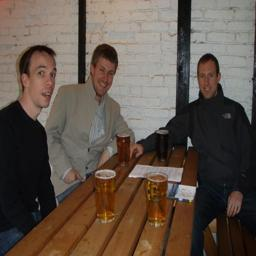

In [6]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread(mypath+"/"+file_names[0],1)
cv2_imshow(img)

In [0]:
def tachMau(img):
    img_lab=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    return img_lab[:,:,0], img_lab

In [11]:
import numpy as np
x_data=np.array([])
y_data=np.array([])
for i in range(10000, 20000):
    img=cv2.imread(mypath+"/"+file_names[i],1)
    img=cv2.resize(img, (256,256))
    img_gray, img_color = tachMau(img)
    img_gray = np.reshape(img_gray, [256,256,1])
    if len(x_data)==0:
        x_data=np.array([img_gray])
        y_data=np.array([img_color])
    else:
        x_data=np.append(x_data, [img_gray], axis=0)
        y_data=np.append(y_data, [img_color], axis=0)
    if i%100==0:
        print("Load "+str(i)+" images complete!")

Load 10000 images complete!
Load 10100 images complete!
Load 10200 images complete!
Load 10300 images complete!
Load 10400 images complete!
Load 10500 images complete!
Load 10600 images complete!
Load 10700 images complete!
Load 10800 images complete!
Load 10900 images complete!
Load 11000 images complete!
Load 11100 images complete!
Load 11200 images complete!
Load 11300 images complete!
Load 11400 images complete!
Load 11500 images complete!
Load 11600 images complete!
Load 11700 images complete!
Load 11800 images complete!
Load 11900 images complete!
Load 12000 images complete!
Load 12100 images complete!
Load 12200 images complete!
Load 12300 images complete!
Load 12400 images complete!
Load 12500 images complete!
Load 12600 images complete!
Load 12700 images complete!
Load 12800 images complete!
Load 12900 images complete!
Load 13000 images complete!
Load 13100 images complete!
Load 13200 images complete!
Load 13300 images complete!
Load 13400 images complete!
Load 13500 images co

In [0]:
np.save("/content/drive/My Drive/ToMau_GAN/x_data_2.npy",x_data)
np.save("/content/drive/My Drive/ToMau_GAN/y_data_2.npy",y_data)

In [10]:
print(x_data.shape)

(10000, 256, 256, 1)
